# Cleaning: Population Data

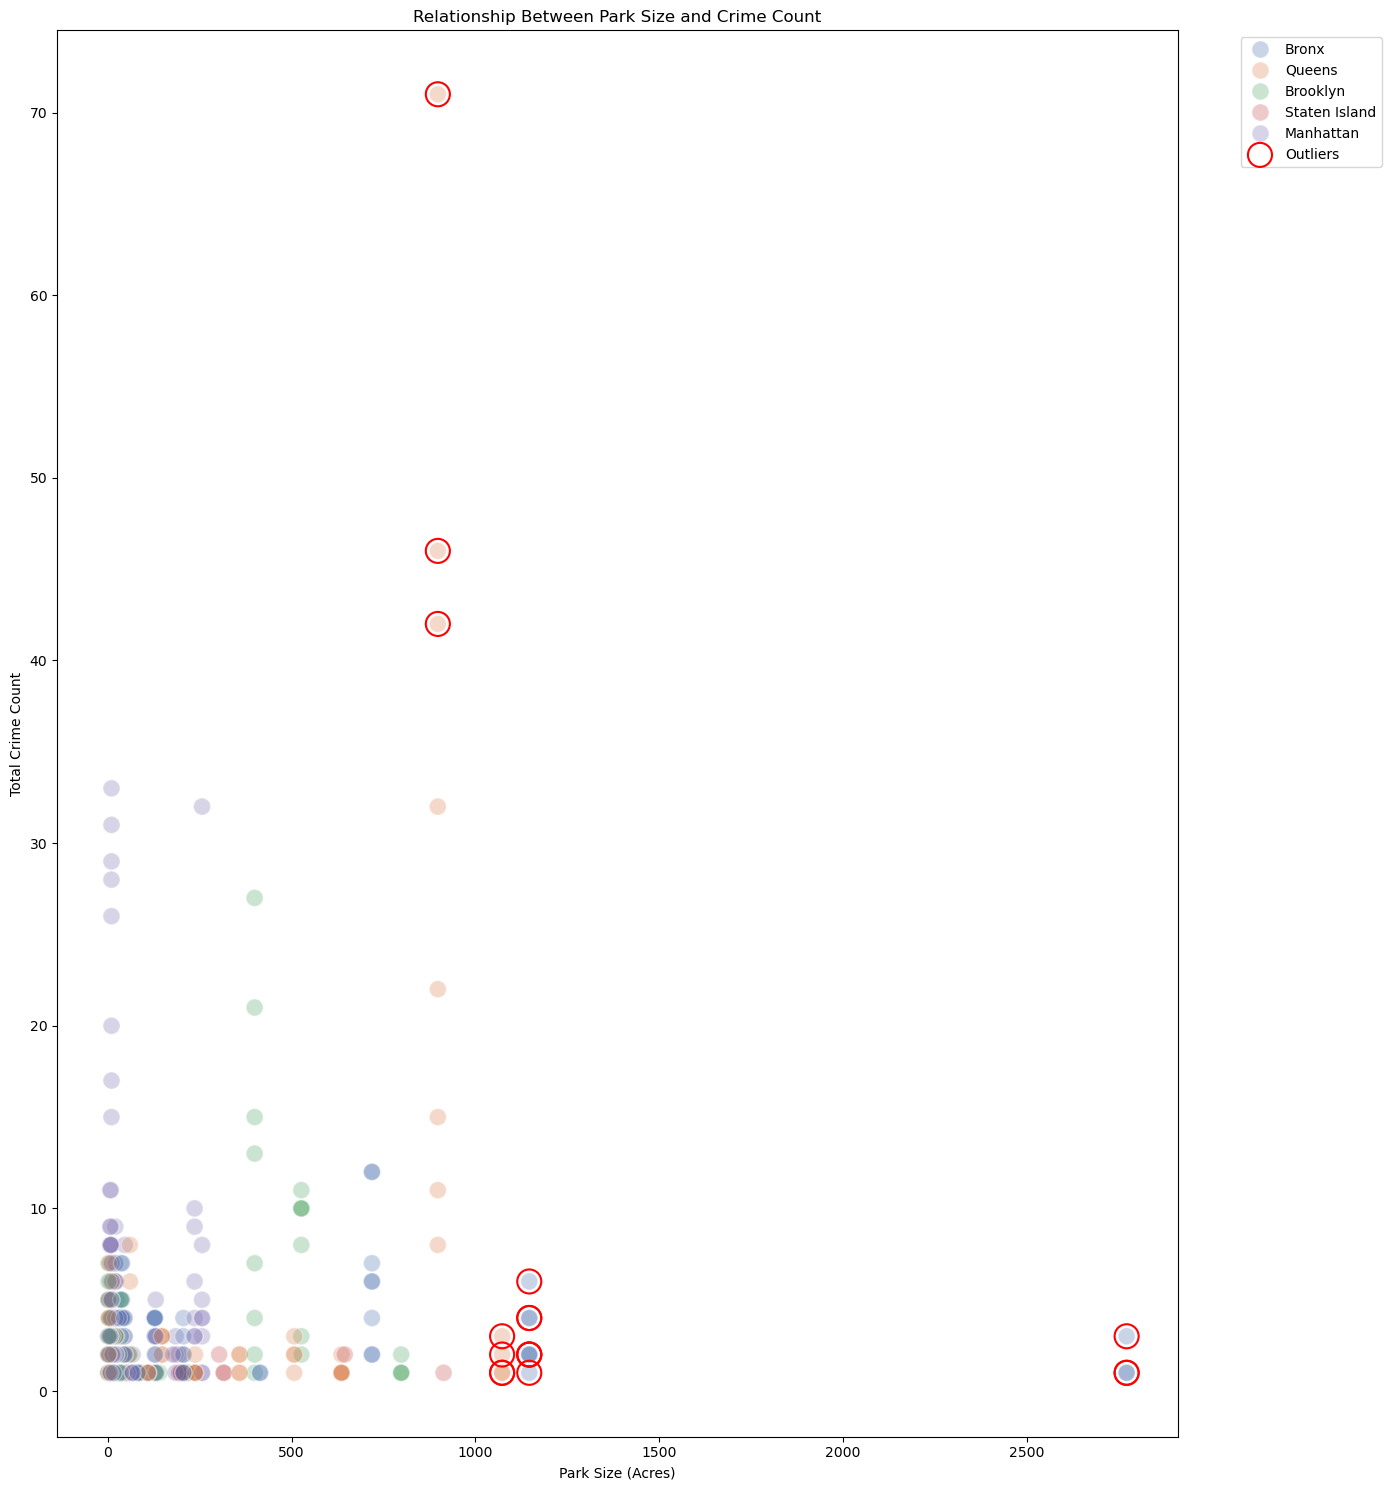

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pop
pop_df = pd.read_csv("New_York_City_Population_by_Borough__1950_-_2040.csv")
pop_df.columns = pop_df.columns.str.strip()
pop_2020_df = pop_df[pop_df["Age Group"] == "Total Population"][["Borough", "2020"]].copy()
pop_2020_df["Borough"] = pop_2020_df["Borough"].str.strip().str.title()
pop_2020_df = pop_2020_df[pop_2020_df["Borough"] != "Nyc Total"]
borough_pop = pop_2020_df.set_index("Borough")["2020"].to_dict()

# crime
df = pd.read_csv("combined_nyc_park_crime_stats.csv")
df.columns = df.columns.str.strip().str.upper()
df["BOROUGH"] = df["BOROUGH"].str.strip().str.title()
df = df[df["BOROUGH"] != "Brooklyn/Queens"]

# df
required_cols = ['SIZE (ACRES)', 'TOTAL', 'BOROUGH', 'PARK']
combined_df = df[required_cols].dropna()
combined_df = combined_df[combined_df['SIZE (ACRES)'] > 0]
combined_df = combined_df[combined_df['TOTAL'] > 0]

# scatter plot
plt.figure(figsize=(14, 15))
sns.scatterplot(data=combined_df, x='SIZE (ACRES)', y='TOTAL', hue='BOROUGH', palette='deep', s=150, alpha=.3)

outliers = combined_df[(combined_df['TOTAL'] > 40) | (combined_df['SIZE (ACRES)'] > 1000)]

# annotations for outliers
plt.scatter(
    outliers['SIZE (ACRES)'],
    outliers['TOTAL'],
    s=300,                     
    facecolors='none',    
    edgecolors='red', 
    linewidths=1.5,
    label='Outliers'
)

plt.title('Relationship Between Park Size and Crime Count')
plt.xlabel('Park Size (Acres)')
plt.ylabel('Total Crime Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('parksize_vs_crime_annotated.png')
plt.show()
